# **HEART CLASSIFICATION MODEL**

Using patient health metrics to predict heart disease, enabling early detection and improving preventive care.

## Data Collection and Cleaning

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd

In [2]:
#loading the dataset
df = pd.read_csv("../datasets/heart.csv")

### Preview of data

In [3]:
#displaying the first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#extracting the shape of the dataset
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Exploratory Data Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Overview and Statistics

In [7]:
#extracting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#finding missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#finding duplicated rows in the dataset
print(f"Duplicated rows: {df.duplicated().sum()}")

Duplicated rows: 1


In [10]:
#dropping duplicated rows
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

0 -> negative case\
1 -> positive case

In [13]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


#### Data Visualization

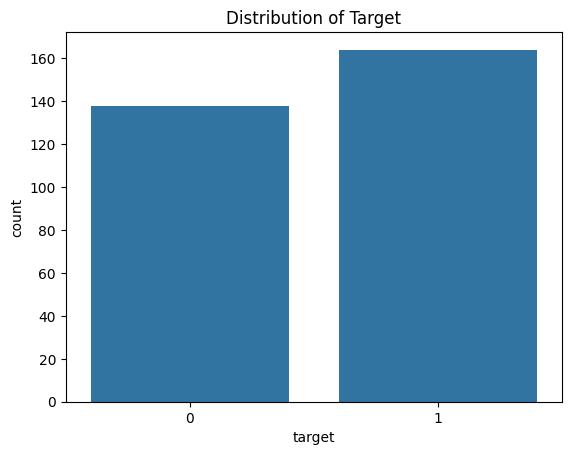

In [14]:
# Plot distribution of target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target')
plt.show()


Target variable is fairly balanced with both classes having close counts.
This suggests no immediate need for handling class imbalance.

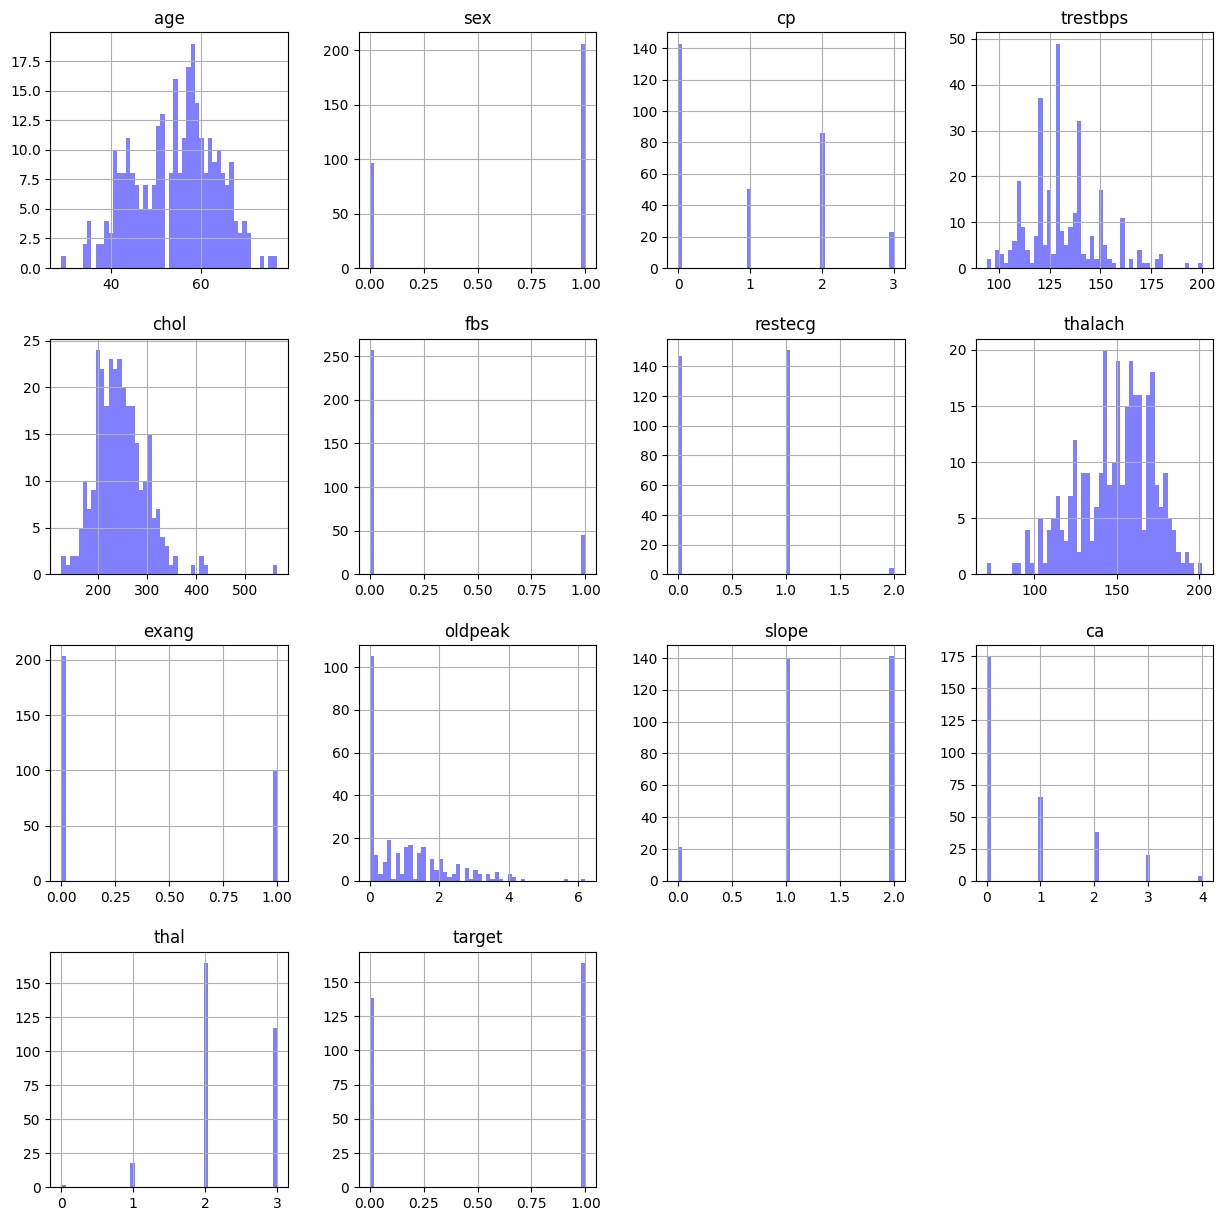

In [15]:
df.hist(bins = 50, figsize = (15, 15), color = 'b', grid=True, alpha=0.5)
plt.show()

Districution of numerical and categorical variables:
- **Age, trestbps, thalach**: Approximately normal distributions.
- **Chol, oldpeak**: Right-skewed, potential outliers.
- **Categorical features** (`cp`, `restecg`, `slope`, `thal`, `sex`): Show distinct category distributions.
- **ca and fbs**: Most values concentrated at 0.

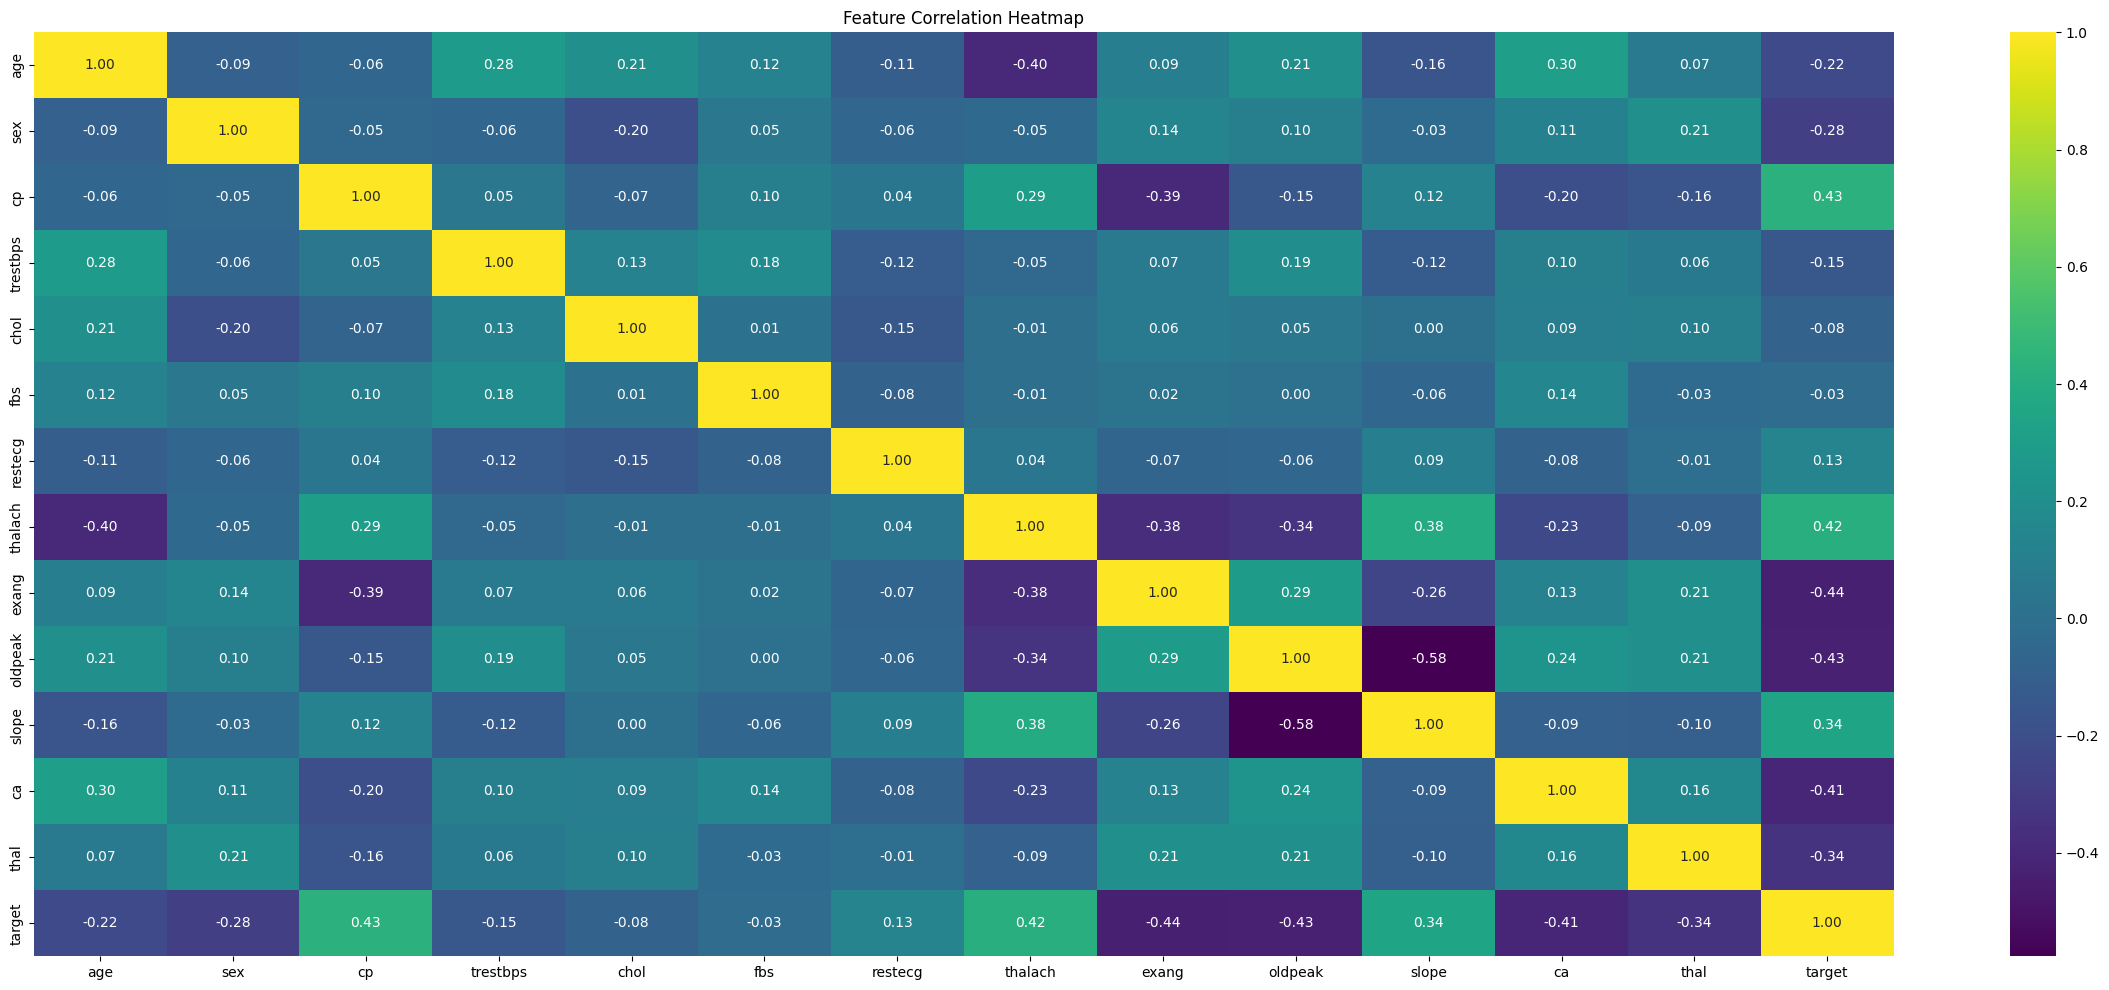

In [16]:
plt.figure(figsize=(30, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

- **Strong Positive Correlation**: `cp` (chest pain type) and `thalach` (max heart rate) are positively correlated with the presence of heart disease.
- **Strong Negative Correlation**: `exang` (exercise-induced angina), `oldpeak`, and `ca` have a negative correlation with the target.
- **Low Correlation**: Features like `chol` and `trestbps` show weak relationships with heart disease.

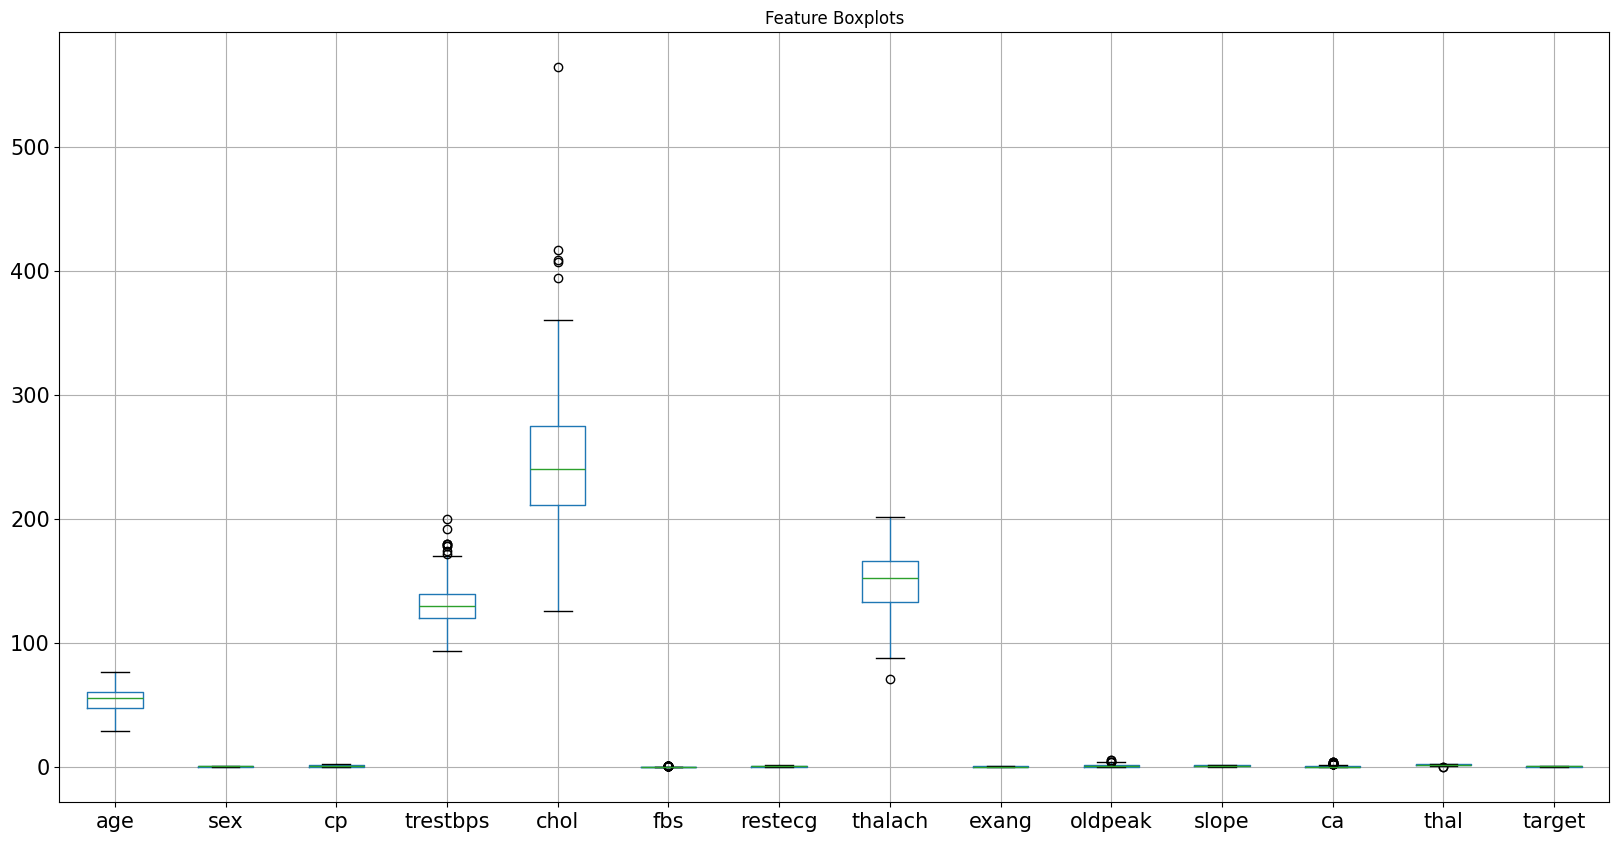

In [17]:
#Boxplotss for all numerical features
df.boxplot(grid=True, fontsize=15, figsize=(20,10))
plt.title("Feature Boxplots")
plt.show()

The boxplots visualize the distribution of numerical features, highlighting key insights:

- **Outliers detected** in `chol`, `trestbps`, `thalach`, and `oldpeak`, which could impact model performance.

## Feature Engineering

In [18]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler

In [19]:
X = df.drop('target', axis=1)
Y = df['target']

In [20]:
#scaling the data
scaler =  StandardScaler()

In [21]:
X_scaled = scaler.fit_transform(X)

## Training and Testing Datasets

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
print("Class Distribution:\n", Y.value_counts(normalize=True))

Class Distribution:
 target
1    0.543046
0    0.456954
Name: proportion, dtype: float64


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, 
    Y, 
    test_size=0.2, 
    random_state=42, 
    stratify=Y)

In [25]:
print("Training Set Class Distribution:\n", Y_train.value_counts(normalize=True))
print("Testing Set Class Distribution:\n", Y_test.value_counts(normalize=True))

Training Set Class Distribution:
 target
1    0.543568
0    0.456432
Name: proportion, dtype: float64
Testing Set Class Distribution:
 target
1    0.540984
0    0.459016
Name: proportion, dtype: float64


In [26]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((241, 13), (61, 13), (241,), (61,))

## Model Building

In [27]:
#importing necessary libraries
from sklearn.svm import SVC

In [28]:
model = SVC(kernel='rbf', C=1.0, random_state=42, class_weight='balanced')

In [29]:
model.fit(X_train, Y_train)

SVC(class_weight='balanced', random_state=42)

In [30]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

## Evaluation

In [31]:
#import necessary libraries

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
print(accuracy_score(Y_train, Y_train_pred))

0.921161825726141


In [33]:
print(accuracy_score(Y_test, Y_test_pred))

0.8360655737704918


In [34]:
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



<Axes: >

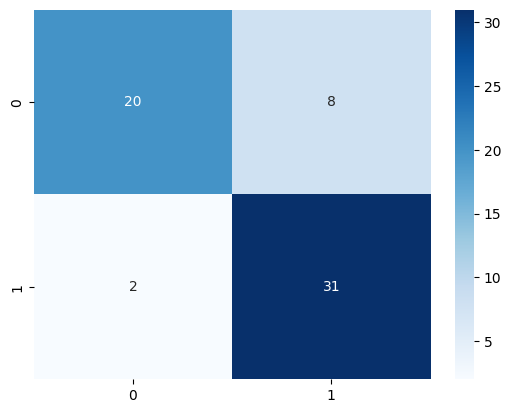

In [35]:
cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot = True, cmap = 'Blues')

## Model Saving

In [36]:
#importing necessary libraries
import pickle

In [37]:
filename = "heart_disease_model.sav"

In [38]:
#Save trained model
pickle.dump(model, open(filename, 'wb'))

In [39]:
scaler_filename = "heart_disease_model_scaler.pkl"

In [40]:
#Saving the scaler
pickle.dump(scaler, open(scaler_filename, 'wb'))